# Minimal OpenSCM-Runner example with FaIR

Requires fair == 1.6.0a4

In [1]:
import openscm_runner

In [2]:
# NBVAL_IGNORE_OUTPUT
print(openscm_runner.__version__)

0.1.0-alpha.1+16.g8812614.dirty


In [3]:
import pandas as pd
import pyam
import numpy as np
import matplotlib.pyplot as pl

import openscm_runner
print(openscm_runner.__file__)

from tqdm import tqdm_notebook

from openscm_runner.run import run
from openscm_runner.adapters import FAIR
from fair.tools.scmdf import scmdf_to_emissions

from fair.forward import fair_scm

<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler


/nfs/b0110/Users/mencsm/openscm-runner/src/openscm_runner/__init__.py


/nfs/b0110/Users/mencsm/openscm-runner/src/openscm_runner/run.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
fair=FAIR()

In [5]:
fair.get_version()

'1.6.0a4+2.gc95422e'

In [6]:
df = pd.read_csv('../data/tiny_example_emissions_harmonized_infilled.csv')
df = pyam.IamDataFrame(df)
df_clean = df.filter(variable="*Infilled*")
df_fair = pyam.IamDataFrame(df_clean.timeseries().reset_index())

In [7]:
x = run(
    climate_models_cfgs={
            "FAIR": [{}],   # passing an empty list of an empty dict will run with defaults
        },
    scenarios=df_fair,
    output_variables=(
        'Surface Temperature',
        'Atmospheric Concentrations|CO2',
        'Airborne Fraction',
        'Ocean Heat Uptake',
        'Net Energy Imbalance',
        'Effective Climate Feedback'
    )
)

In [8]:
x = x.timeseries()

In [9]:
x

time                                                                        1765-01-01  \
model  scenario region      variable                       unit                          
model1 1point5  unspecified Ocean Heat Uptake              J              9.700062e+20   
                            Surface Temperature            K              7.049926e-03   
                            Net Energy Imbalance           W/m**2         6.026356e-02   
                            Effective Climate Feedback     W/m**2/K       1.367001e+00   
                            Airborne Fraction              dimensionless  0.000000e+00   
                            Atmospheric Concentrations|CO2 ppm            2.780516e+02   
model2 1point5  unspecified Ocean Heat Uptake              J              9.700062e+20   
       2point0  unspecified Ocean Heat Uptake              J              9.700062e+20   
       1point5  unspecified Surface Temperature            K              7.049926e-03   
       2point0  unspecified Surface Temperature            K              7.049926e-03   
       1point5  unspecified Net Energy Imbalance           W/m**2         6.026356e-02   
       2point0  unspecified Net Energy Imbalance           W/m**2         6.026356e-02   
       1point5  unspecified Effective Climate Feedback     W/m**2/K       1.367001e+00   
       2point0  unspecified Effective Climate Feedback     W/m**2/K       1.367001e+00   
       1point5  unspecified Airborne Fraction              dimensionless  0.000000e+00   
       2point0  unspecified Airborne Fraction              dimensionless  0.000000e+00   
       1point5  unspecified Atmospheric Concentrations|CO2 ppm            2.780516e+02   
       2point0  unspecified Atmospheric Concentrations|CO2 ppm            2.780516e+02   

time                                                                        1766-01-01  \
model  scenario region      variable                       unit                          
model1 1point5  unspecified Ocean Heat Uptake              J              1.919327e+21   
                            Surface Temperature            K              1.341255e-02   
                            Net Energy Imbalance           W/m**2         5.897846e-02   
                            Effective Climate Feedback     W/m**2/K       1.366412e+00   
                            Airborne Fraction              dimensionless  8.208985e-01   
                            Atmospheric Concentrations|CO2 ppm            2.780685e+02   
model2 1point5  unspecified Ocean Heat Uptake              J              1.919327e+21   
       2point0  unspecified Ocean Heat Uptake              J              1.919327e+21   
       1point5  unspecified Surface Temperature            K              1.341255e-02   
       2point0  unspecified Surface Temperature            K              1.341255e-02   
       1point5  unspecified Net Energy Imbalance           W/m**2         5.897846e-02   
       2point0  unspecified Net Energy Imbalance           W/m**2         5.897846e-02   
       1point5  unspecified Effective Climate Feedback     W/m**2/K       1.366412e+00   
       2point0  unspecified Effective Climate Feedback     W/m**2/K       1.366412e+00   
       1point5  unspecified Airborne Fraction              dimensionless  8.208985e-01   
       2point0  unspecified Airborne Fraction              dimensionless  8.208985e-01   
       1point5  unspecified Atmospheric Concentrations|CO2 ppm            2.780685e+02   
       2point0  unspecified Atmospheric Concentrations|CO2 ppm            2.780685e+02   

time                                                                        1767-01-01  \
model  scenario region      variable                       unit                          
model1 1point5  unspecified Ocean Heat Uptake              J              2.991607e+21   
                            Surface Temperature            K              2.017861e-02   
                            Net Energy

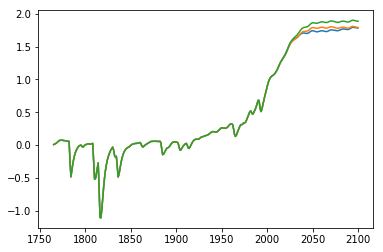

In [10]:
pl.plot(np.arange(1765,2101), x.loc[x.index.get_level_values(3)=='Surface Temperature'].T)

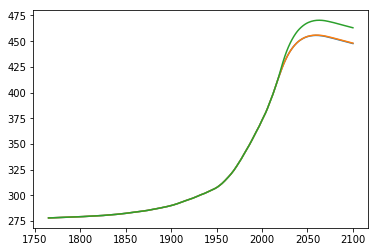

In [11]:
pl.plot(np.arange(1765,2101), x.loc[x.index.get_level_values(3)=='Atmospheric Concentrations|CO2'].T)

In [12]:
#x.to_csv('~/junk.csv')